In [1]:
#clear data
rm(list=ls())

# Read the abalone.csv file
data = read.table("https://courses.cs.ut.ee/MTAT.03.183/2016_spring/uploads/Main/abalone.csv", head=TRUE,sep = ",")


In [5]:
# Question # 1

# Get the names of the columns of the data
colnames(data)

# Get the number of rows in the data
nrow(data)

# Get the first 3 rows of data
head(data, 3)

# Get the last 2 rows of data
tail(data, 2)

# Weight of the last 2 rows
tail(data$Weight, 2)

# Value of diameter in the row 755
data[755,]$Diameter

# Number of missing values in height column
sum(is.na(data$Height))

# Mean of the values of the height column, excluding missing values
mean(data$Height, na.rm=TRUE)

# Subset of Gender="M" and Weight < 0.75
ss = subset(data, Gender == "M" & Weight < 0.75)
# Mean of the diameter if the subset
mean(ss$Diameter, na.rm=TRUE)

# Most Frequent Value in Rings
mostFrequentRingValue = sort(table(data$Rings),decreasing=TRUE)[1]
names(mostFrequentRingValue)
# With number of occurences
cat(mostFrequentRingValue[1])

# Subset of data with ring value equal to 18
ss2 = subset(data, Rings == 18)
# Minimum length of the subset
min(ss2$Length)


[1] "Gender"   "Length"   "Diameter" "Height"   "Weight"   "Rings"

[1] 1000

Gender Length Diameter Height Weight Rings
1      F  0.505    0.385  0.135 0.6185    12
2      F  0.650    0.475  0.165 1.3875     9
3      I  0.520    0.380  0.135 0.5395     8

Gender Length Diameter Height Weight Rings
999       I  0.525    0.400  0.130 0.6455     8
1000      M  0.515    0.395  0.135 1.0070     8

[1] 0.6455 1.0070

[1] 0.385

[1] 4

[1] 0.1398092

[1] 0.3426471

[1] "9"

176

[1] 0.465

Gender     Length   Diameter     Height     Weight      Rings 
 2.0810000  0.5227600  0.4059550  0.1398092  0.8255405 11.3180000

Gender Length Diameter Height Weight Rings
[1,]      2  0.545     0.42 0.1425  0.801     9

Gender Length Diameter Height Weight Rings
[1,]      3  0.815     0.65   1.13  2.555  1500

Gender Length Diameter Height Weight Rings
[1,]      1  0.075    0.055      0  0.002     1

Gender    Length   Diameter     Height    Weight   Rings
[1,] 0.8228707 0.1200641 0.09883183 0.04942548 0.4903796 47.2277

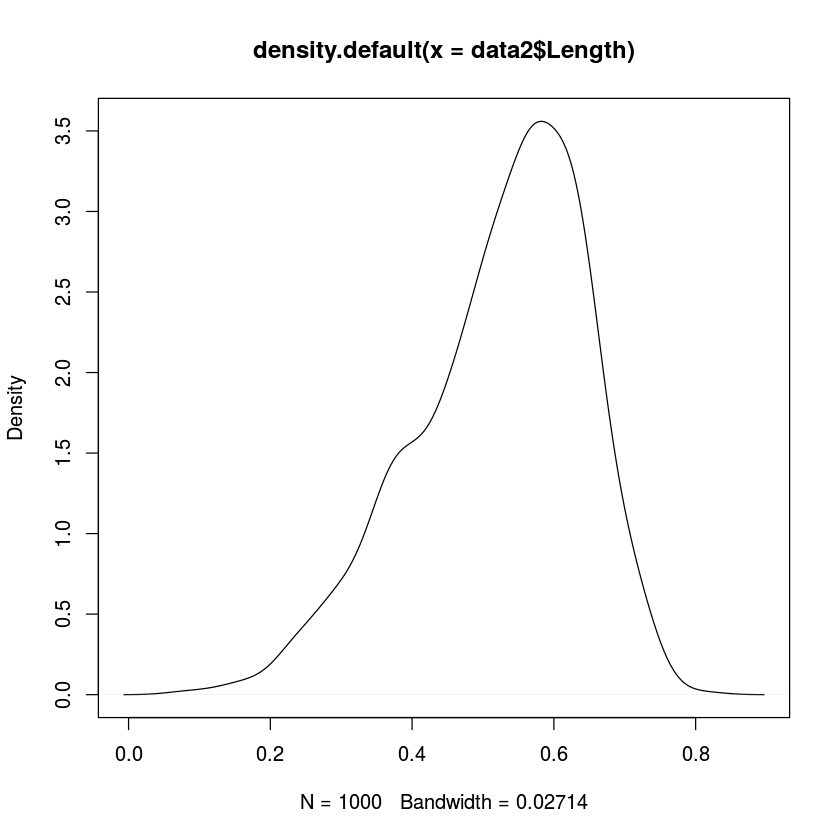

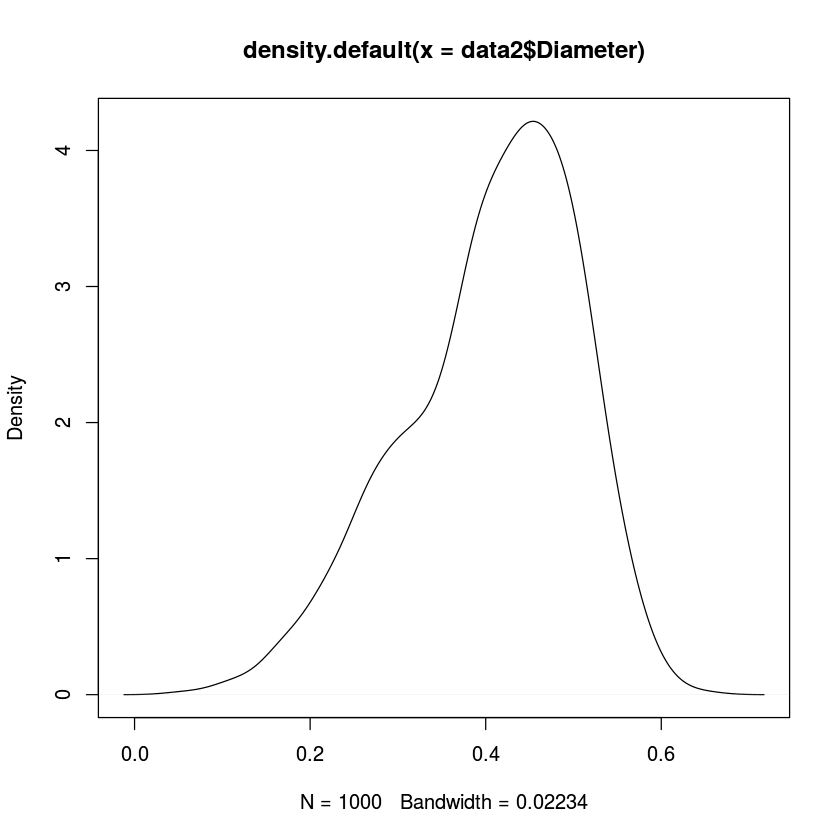

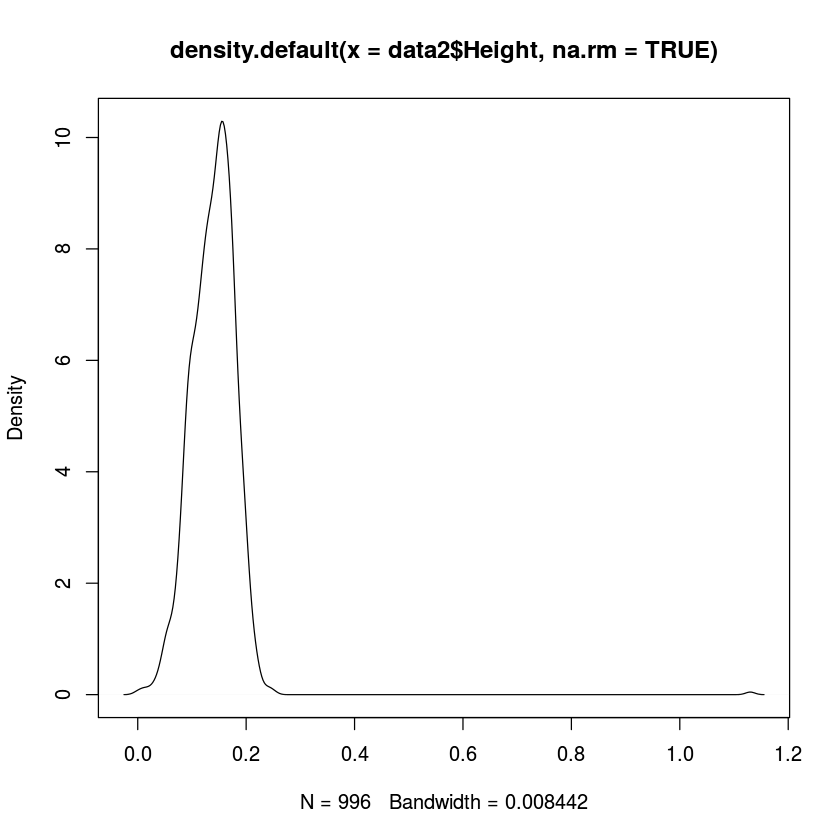

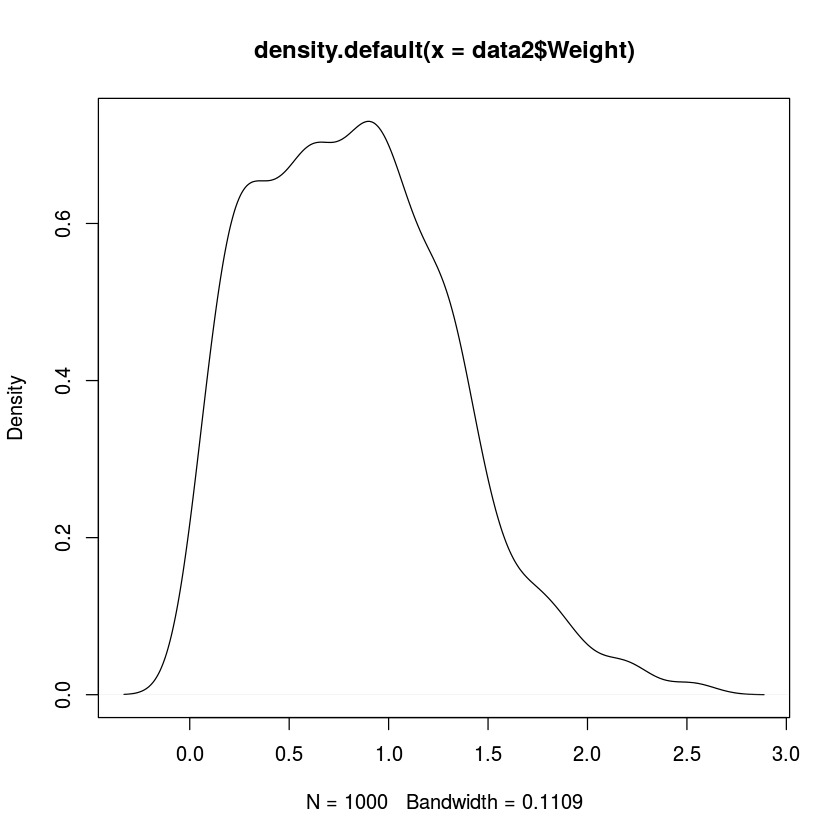

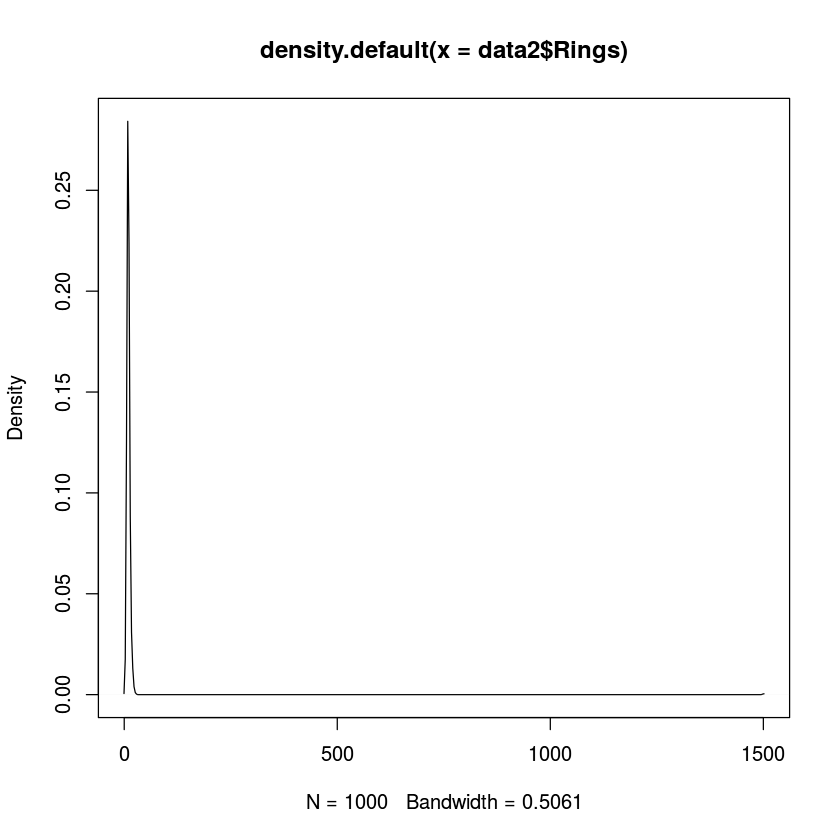

In [6]:
# Question # 2
columns = c("Gender", "Length", "Diameter", "Height", "Weight", "Rings")
data2= 0
data2 = data
# Replacing M = 3, I = 2, F = 1 for gender
data2$Gender <- as.integer(data2$Gender)

# Mean of each column
means = colMeans(data2, na.rm=TRUE)
means

# Median of each column
medians = matrix(c(median(data2$Gender, na.rm=TRUE), median(data2$Length, na.rm=TRUE), median(data2$Diameter, na.rm=TRUE), median(data2$Height, na.rm=TRUE), median(data2$Weight, na.rm=TRUE), median(data2$Rings, na.rm=TRUE)), nrow=1, ncol=6)
colnames(medians) <- columns
medians

# Max
maxs = matrix(c(max(data2$Gender, na.rm=TRUE), max(data2$Length, na.rm=TRUE), max(data2$Diameter, na.rm=TRUE), max(data2$Height, na.rm=TRUE), max(data2$Weight, na.rm=TRUE), max(data2$Rings, na.rm=TRUE)), nrow=1, ncol=6)
colnames(maxs) <- columns
maxs

# Min
mins = matrix(c(min(data2$Gender, na.rm=TRUE), min(data2$Length, na.rm=TRUE), min(data2$Diameter, na.rm=TRUE), min(data2$Height, na.rm=TRUE), min(data2$Weight, na.rm=TRUE), min(data2$Rings, na.rm=TRUE)), nrow=1, ncol=6)
colnames(mins) <- columns
mins

# Standard Deviation of each column
sds = matrix(c(sd(data2$Gender, na.rm=TRUE), sd(data2$Length, na.rm=TRUE), sd(data2$Diameter, na.rm=TRUE), sd(data2$Height, na.rm=TRUE), sd(data2$Weight, na.rm=TRUE), sd(data2$Rings, na.rm=TRUE)), nrow=1, ncol=6)
colnames(sds) <- columns
sds

# Distribution Plots
plot(density(data2$Length))
plot(density(data2$Diameter))
plot(density(data2$Height, na.rm=TRUE))
plot(density(data2$Weight))
plot(density(data2$Rings))

Length-Diameter Diameter-Weight   Length-Weight Diameter-Height   Length-Height 
     0.98747396      0.92348680      0.92071393      0.69249343      0.68725941 
  Height-Weight    Length-Rings  Diameter-Rings    Weight-Rings    Height-Rings 
     0.67393746      0.04407577      0.03787742      0.03385043      0.03112661

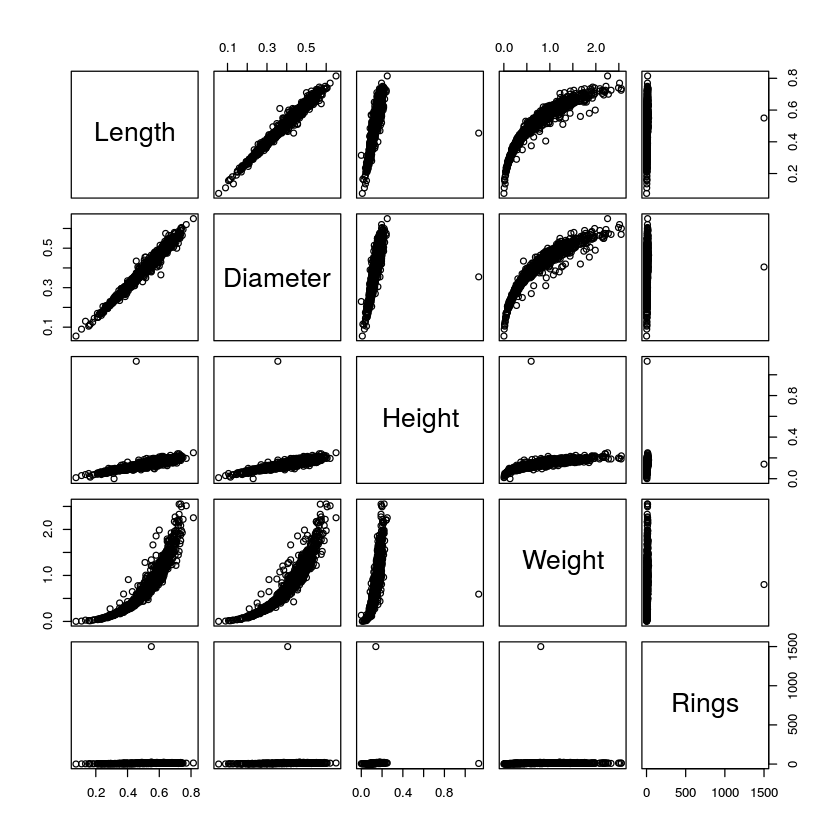

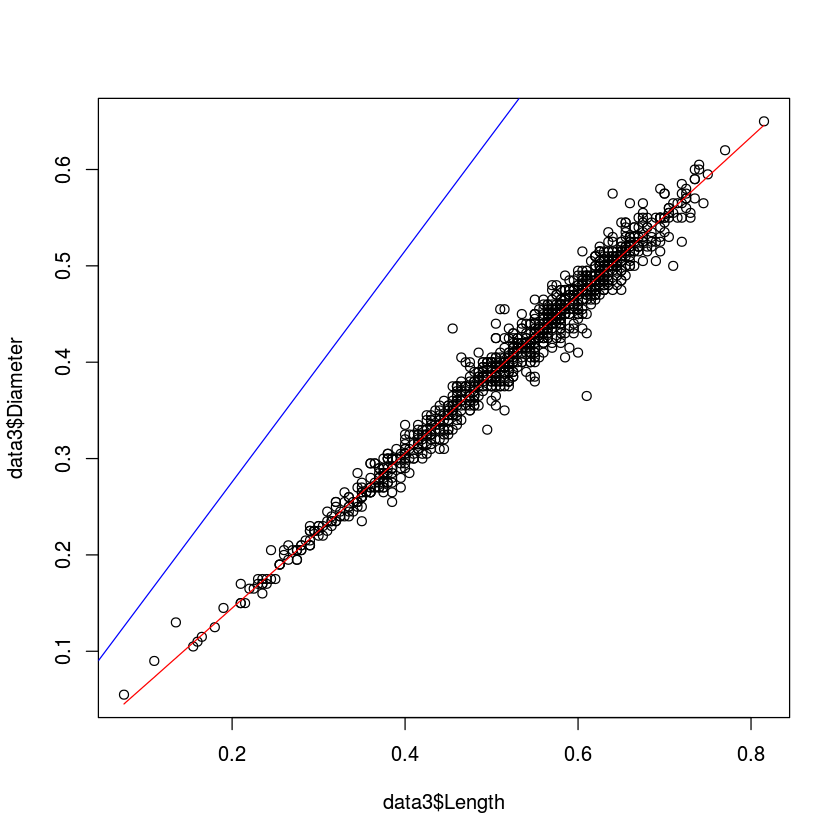

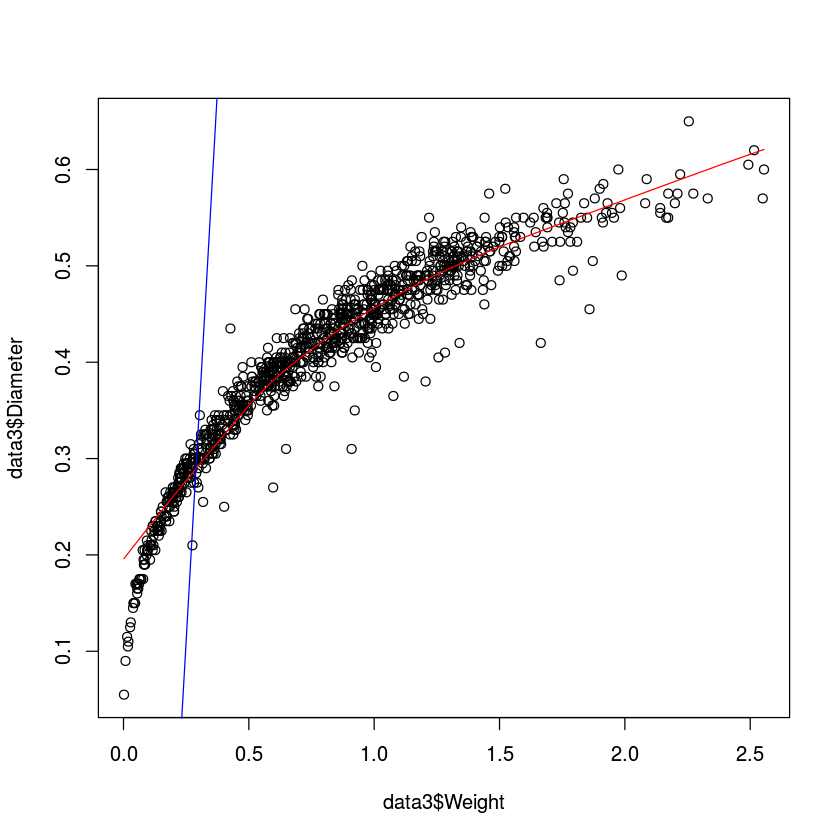

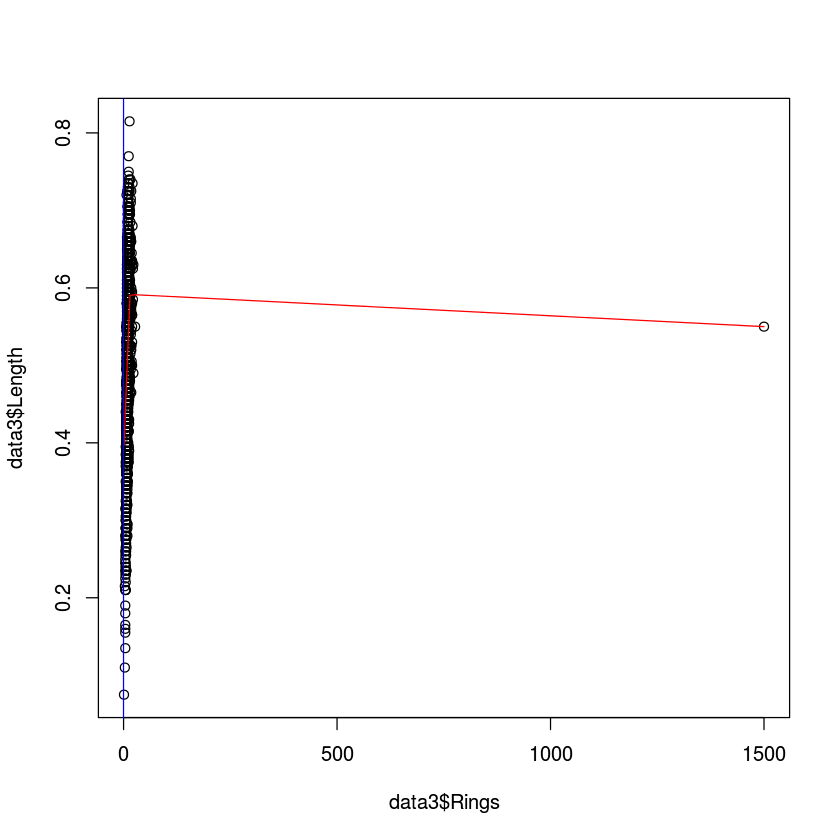

In [7]:
# Question 3
# Correlation Plots and Values
# Removing data with NA and Gender Column
data3 = data[complete.cases(data),2:6]

plot(data3)
# Computing for the correlations of values between the features
correlations <- c(cor(data3$Length, data3$Diameter),
	cor(data3$Length, data3$Height),
	cor(data3$Length, data3$Weight),
	cor(data3$Length, data3$Rings),
	cor(data3$Diameter, data3$Height),
	cor(data3$Diameter, data3$Weight),
	cor(data3$Diameter, data3$Rings),
	cor(data3$Height, data3$Weight),
	cor(data3$Height, data3$Rings),
	cor(data3$Weight, data3$Rings))

# Adding names for each correlation value
names(correlations) <- c("Length-Diameter",
	"Length-Height",
	"Length-Weight",
	"Length-Rings",
	"Diameter-Height",
	"Diameter-Weight",
	"Diameter-Rings",
	"Height-Weight",
	"Height-Rings",
	"Weight-Rings")

# Sorting the correlation results to decreasing
sort(correlations, decreasing = TRUE)

# Length vs Diameter (Highest correlation between two variables)
plot(data3$Length, data3$Diameter)
lines(lowess(data3$Length,data3$Diameter), col="red") 
abline(lm(data3$Length~data3$Diameter), col="blue")

# Weight vs Diameter (Second Highest correlation between two variables)
plot(data3$Weight, data3$Diameter)
lines(lowess(data3$Weight,data3$Diameter), col="red")
abline(lm(data3$Weight~data3$Diameter), col="blue")

# Rings vs Length (Highest correlation value for the rings variable with another variable)
plot(data3$Rings, data3$Length)
lines(lowess(data3$Rings,data3$Length), col="red") 
abline(lm(data3$Rings~data3$Length), col="blue")


[1] Gender   Length   Diameter Height   Weight   Rings   
<0 rows> (or 0-length row.names)

[1] Gender   Length   Diameter Height   Weight   Rings   
<0 rows> (or 0-length row.names)

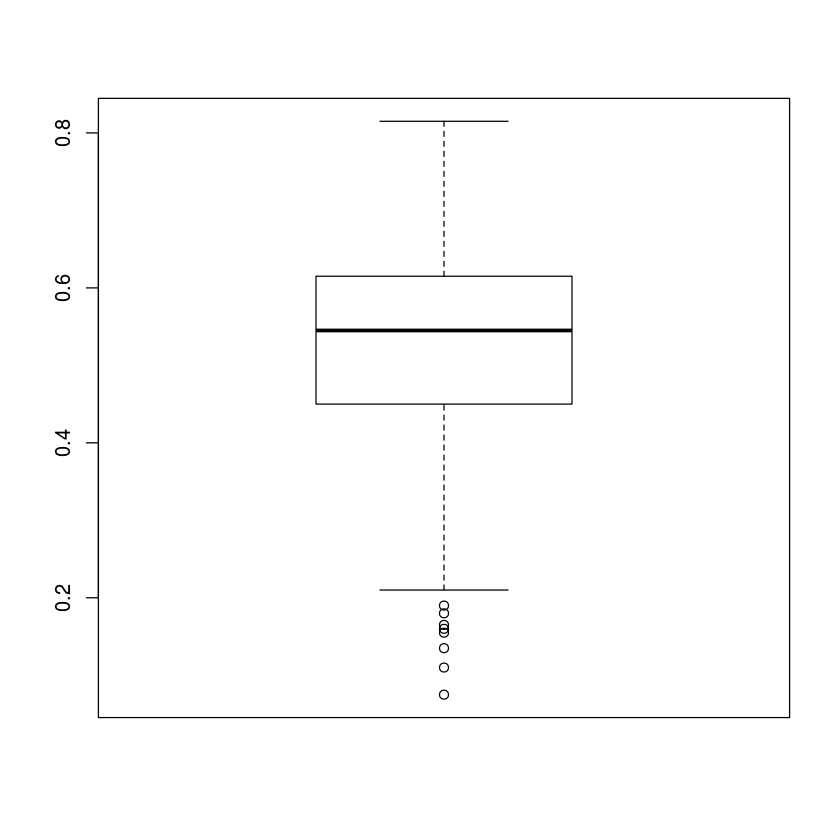

Gender Length Diameter Height Weight Rings
575      F  0.455    0.355   1.13  0.594     8
840      F  0.815    0.650   0.25  2.255    14

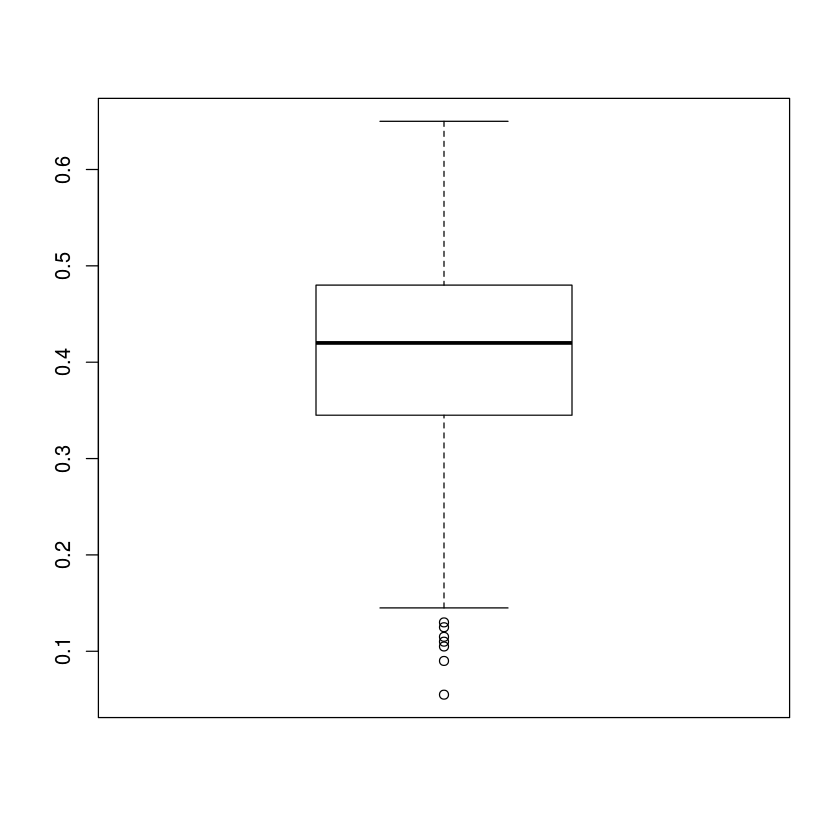

Gender Length Diameter Height Weight Rings
178      M  0.725    0.570  0.190 2.3305     9
318      M  0.725    0.575  0.240 2.2100    13
333      M  0.770    0.620  0.195 2.5155    12
556      M  0.740    0.605  0.200 2.4925    13
611      M  0.700    0.575  0.190 2.2730    12
615      M  0.725    0.570  0.190 2.5500    14
716      F  0.735    0.600  0.220 2.5550    11
840      F  0.815    0.650  0.250 2.2550    14
965      M  0.750    0.595  0.205 2.2205    12

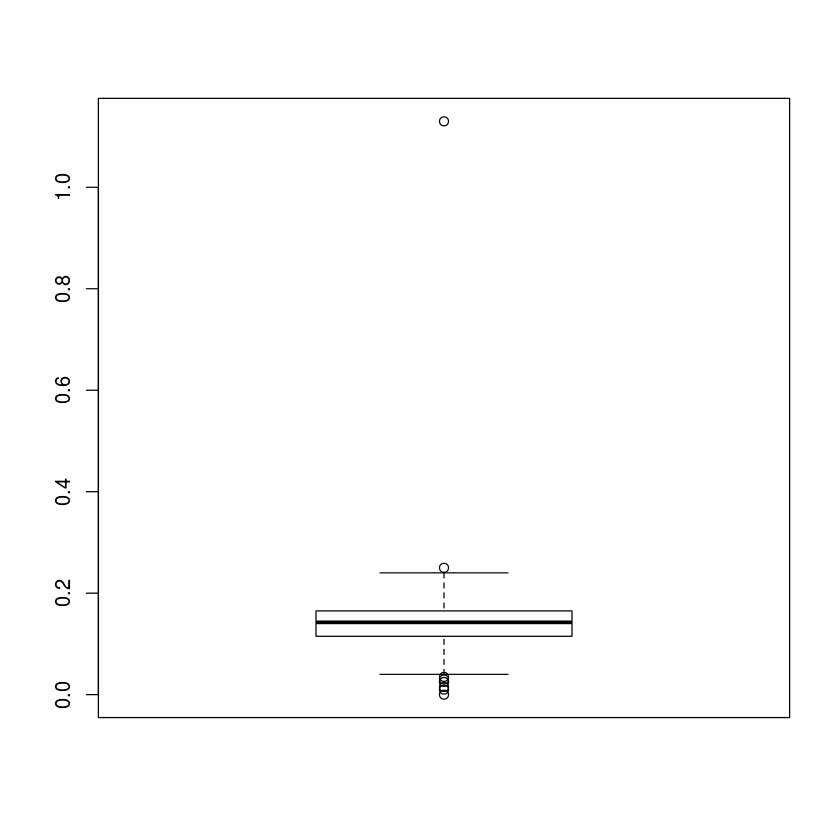

Gender Length Diameter Height Weight Rings
8        F  0.525    0.390  0.135 0.6005    16
14       M  0.635    0.515  0.170 1.2750    16
31       M  0.635    0.525  0.205 1.4840    20
38       M  0.550    0.405  0.140 0.8025  1500
43       F  0.570    0.435  0.140 0.8085    16
61       M  0.630    0.485  0.175 1.3000    23
73       M  0.595    0.475  0.170 1.0965    17
83       F  0.580    0.460  0.150 0.9955    19
85       F  0.725    0.560  0.210 2.1410    18
91       I  0.635    0.480  0.200 1.3655    16
123      F  0.500    0.405  0.140 0.6735    18
200      F  0.580    0.455  0.160 0.9215    17
217      F  0.500    0.400  0.165 0.7105    20
223      M  0.625    0.505  0.215 1.4455    22
250      M  0.525    0.425  0.120 0.8665    18
261      M  0.520    0.435  0.195 0.9730    18
323      F  0.660    0.525  0.205 1.3665    18
337      F  0.465    0.350  0.130 0.4940    18
356      F  0.495    0.400  0.155 0.6445    17
357      F  0.715    0.565  0.240 2.1995    17
359      M  0.565    0.435  0.185 1.0320    20
365      F  0.660    0.565  0.195 1.7605    16
388      F  0.685    0.525  0.175 1.7100    16
390      M  0.565    0.440  0.175 1.1220    20
501      F  0.635    0.500  0.180 1.3120    18
506      M  0.530    0.415  0.130 0.8425    20
509      M  0.565    0.425  0.160 0.9425    17
515      M  0.525    0.430  0.165 0.8645    16
522      F  0.625    0.485  0.190 1.1745    17
555      M  0.565    0.455  0.185 0.9265    16
590      F  0.545    0.405  0.175 0.9800    18
604      F  0.660    0.520  0.200 1.6760    17
620      M  0.645    0.515  0.185 1.4605    19
630      M  0.570    0.475  0.195 1.0295    18
631      F  0.515    0.400  0.170 0.7960    16
642      F  0.630    0.500  0.170 1.3135    20
654      F  0.585    0.450  0.170 0.8685    22
689      F  0.490    0.385  0.150 0.7865    23
726      F  0.600    0.475  0.180 1.1620    18
732      F  0.710    0.565  0.195 1.7265    17
774      F  0.595    0.475  0.170 1.2470    20
783      M  0.665    0.540  0.175 1.3470    17
799      I  0.525    0.410  0.175 0.8740    18
800      F  0.550    0.465  0.180 1.2125    27
845      I  0.580    0.445  0.170 1.1780    20
856      F  0.575    0.450  0.170 1.0475    18
860      F  0.740    0.600  0.195 1.9740    16
876      F  0.580    0.440  0.175 1.0730    19
903      F  0.540    0.440  0.135 0.9590    17
904      M  0.550    0.440  0.160 0.9910    20
918      M  0.735    0.590  0.225 1.7560    21
939      F  0.560    0.445  0.195 0.9810    16
967      I  0.635    0.505  0.190 1.3315    17
969      F  0.505    0.425  0.140 0.8500    19
988      M  0.590    0.485  0.120 0.9110    16
991      F  0.680    0.550  0.200 1.5960    21

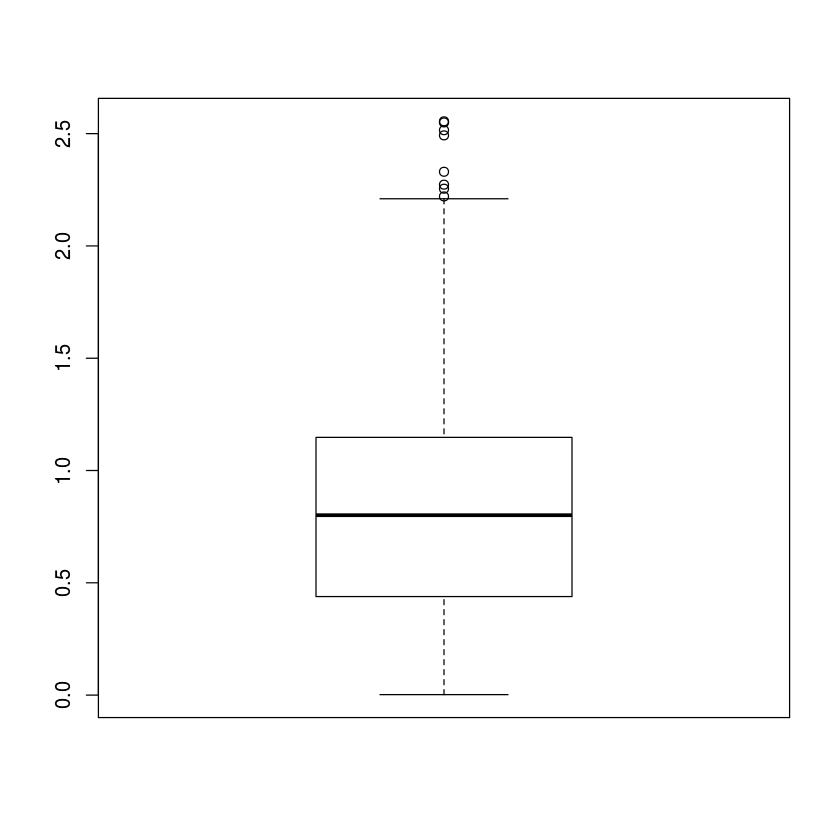

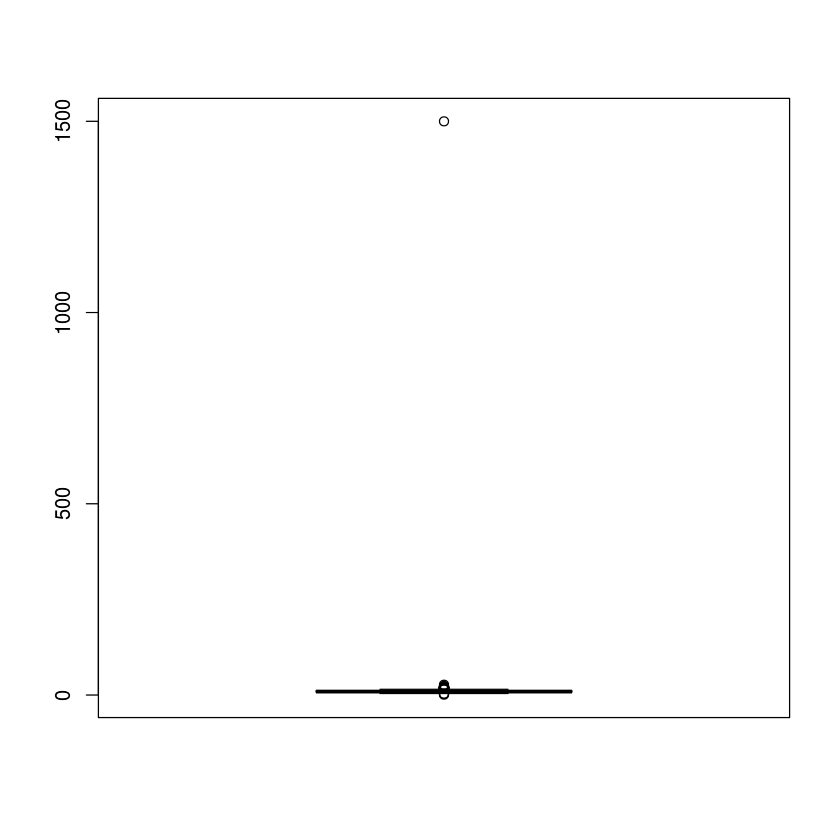

In [8]:

# Question 4

# Length Outliers
IQR = quantile(data$Length,0.75) - quantile(data$Length,0.25)
outliersLength = which(data$Length > (quantile(data$Length,0.75) + 1.5*IQR) )
data[outliersLength,]
boxplot(data$Length)

# Diameter Outliers
IQR = quantile(data$Diameter,0.75) - quantile(data$Diameter,0.25)
outliersDiameter = which(data$Diameter > (quantile(data$Diameter,0.75) + 1.5*IQR) )
data[outliersDiameter,]
boxplot(data$Diameter)

# Height Outliers
IQR = quantile(data$Height,0.75, na.rm=TRUE) - quantile(data$Height,0.25, na.rm=TRUE)
outliersHeight = which( data$Height> (quantile(data$Height,0.75, na.rm=TRUE) + 1.5*IQR) )
data[outliersHeight,]
boxplot(data$Height)

# Weight Outliers
IQR = quantile(data$Weight,0.75) - quantile(data$Weight,0.25)
outliersWeight = which(data$Weight> (quantile(data$Weight,0.75) + 1.5*IQR) )
data[outliersWeight,]
boxplot(data$Weight)

# Rings Outliers
IQR = quantile(data$Rings,0.75) - quantile(data$Rings,0.25)
outliersRings = which(data$Rings > (quantile(data$Rings,0.75) + 1.5*IQR) )
data[outliersRings,]
boxplot(data$Rings)

Gender Length Diameter Height Weight Rings
[1,]      2   0.54    0.415   0.14 0.7575     9

Gender Length Diameter Height Weight Rings
[1,]      3  0.745     0.59  0.225  2.173    15

Gender Length Diameter Height Weight Rings
[1,]      1  0.075    0.055      0  0.002     1

Gender    Length   Diameter     Height    Weight    Rings
[1,] 0.81025 0.1198339 0.09819608 0.03724101 0.4663275 2.365717

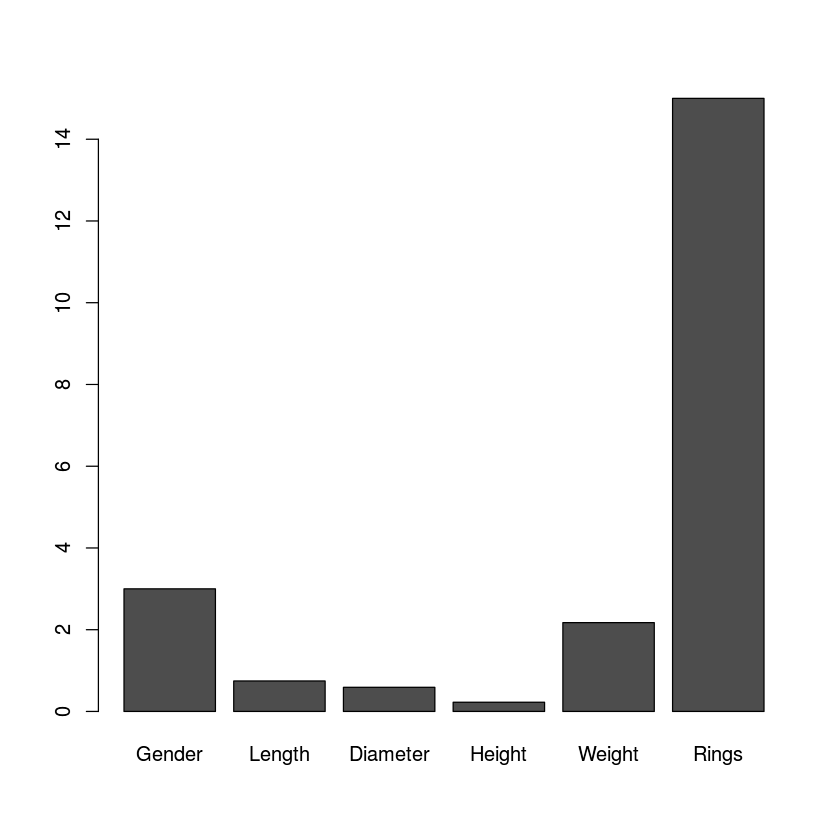

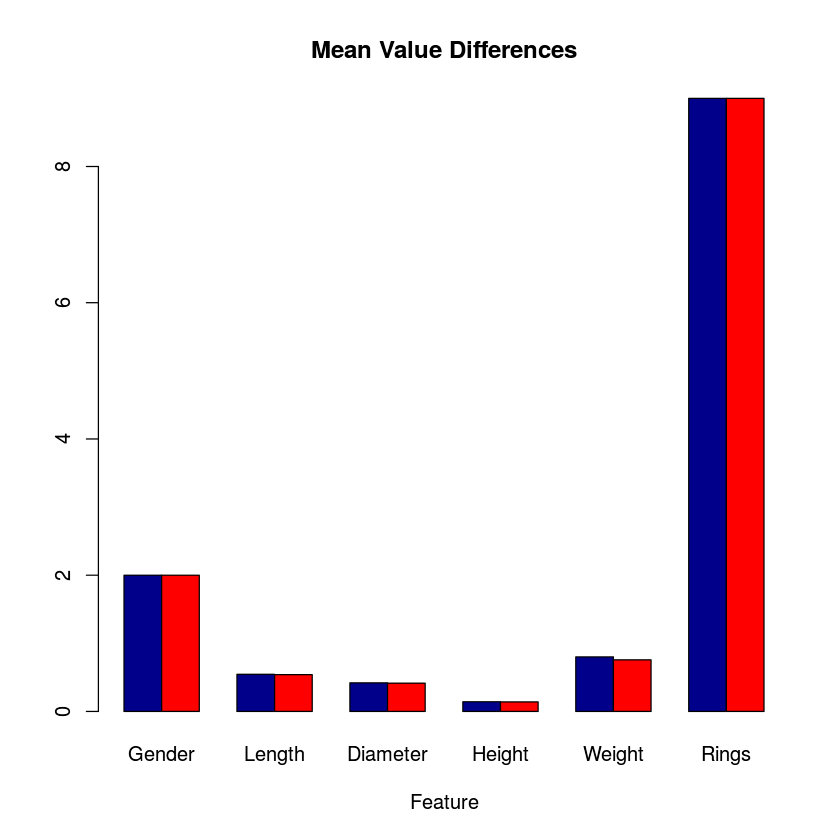

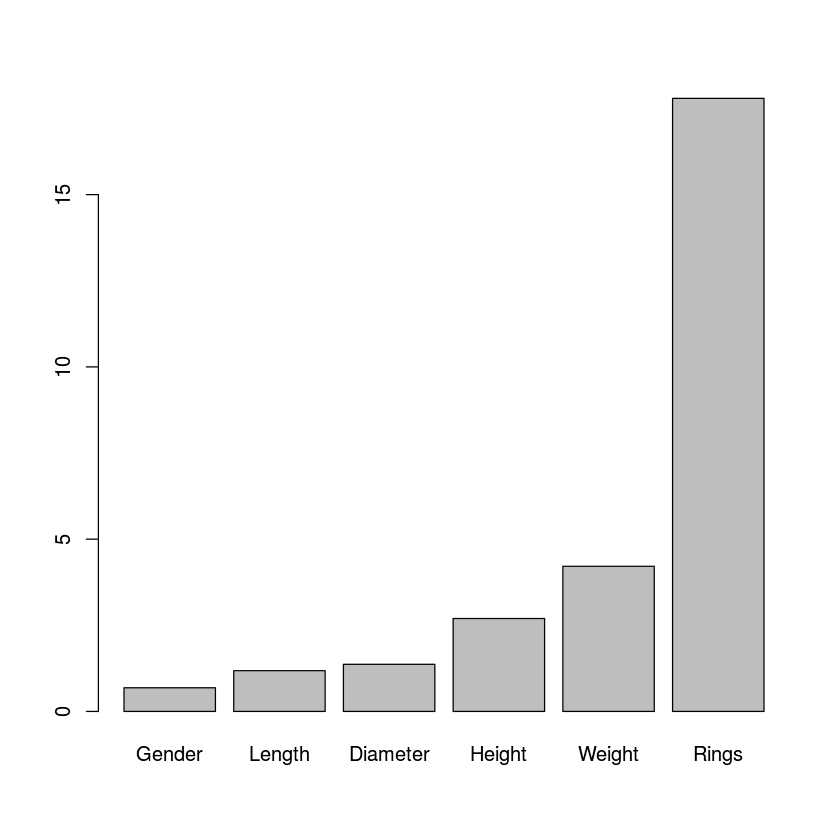

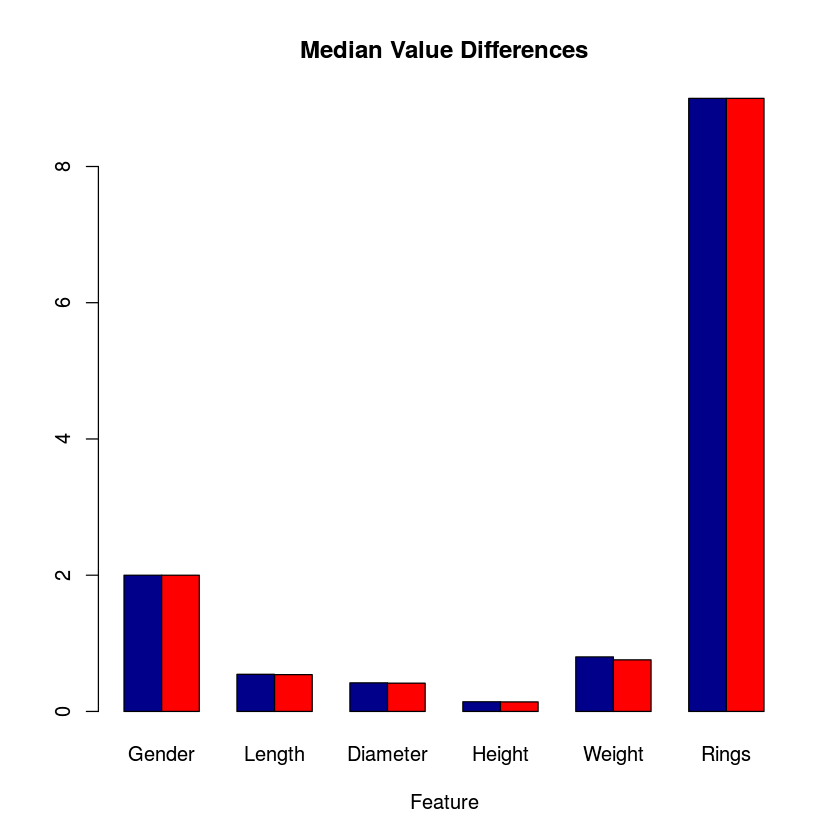

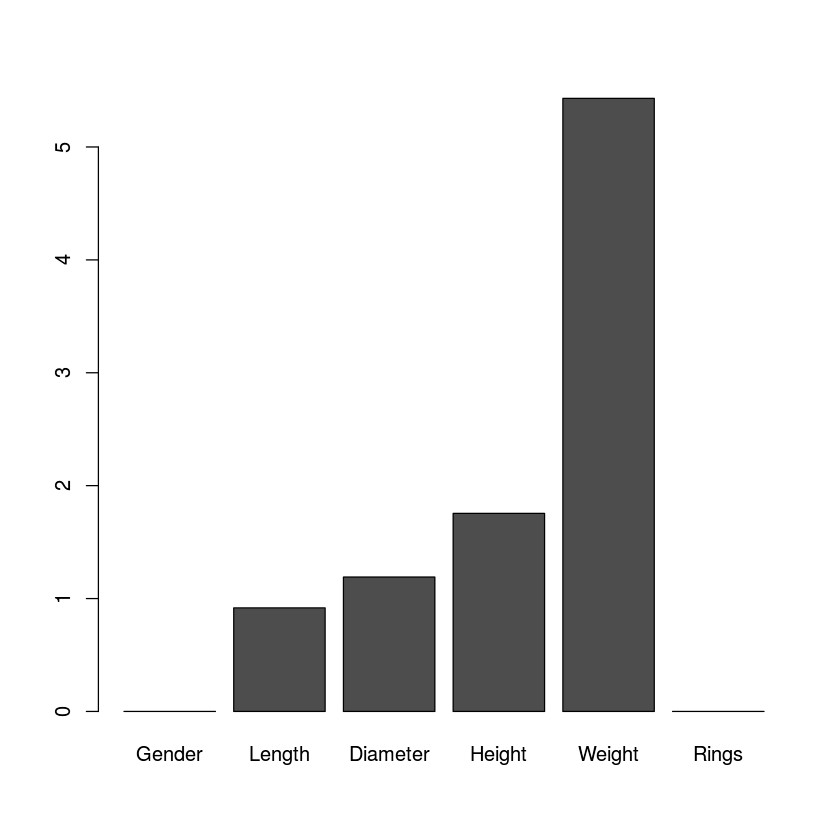

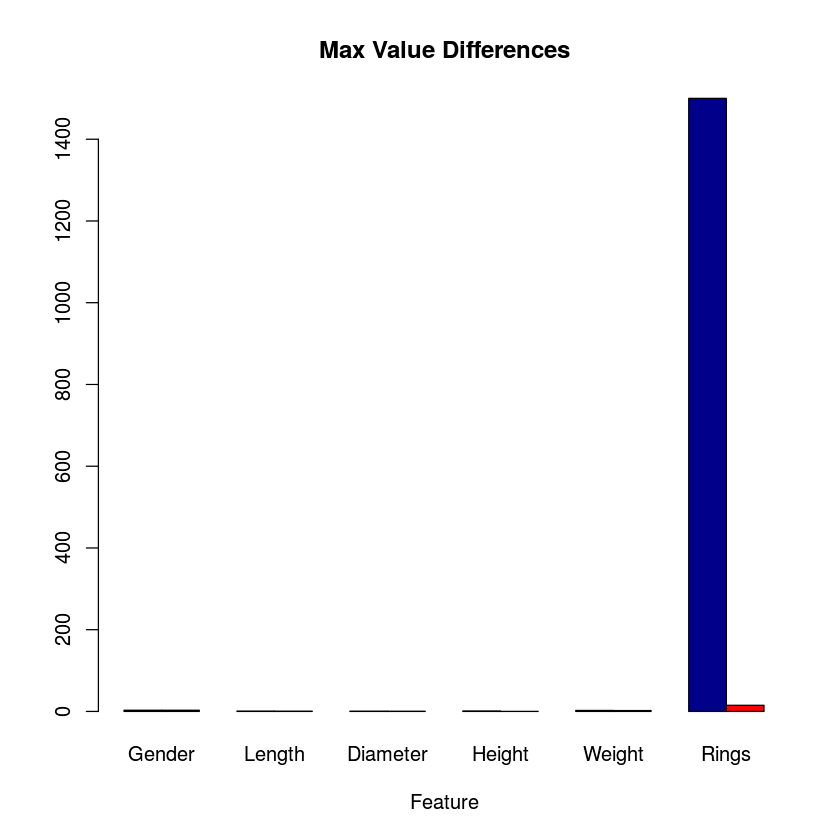

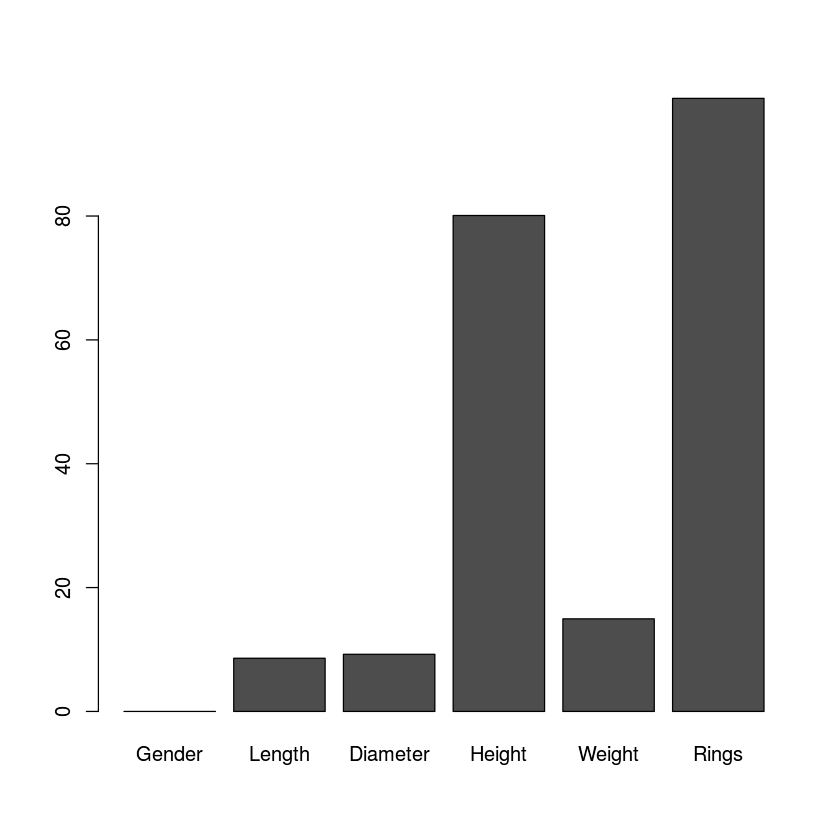

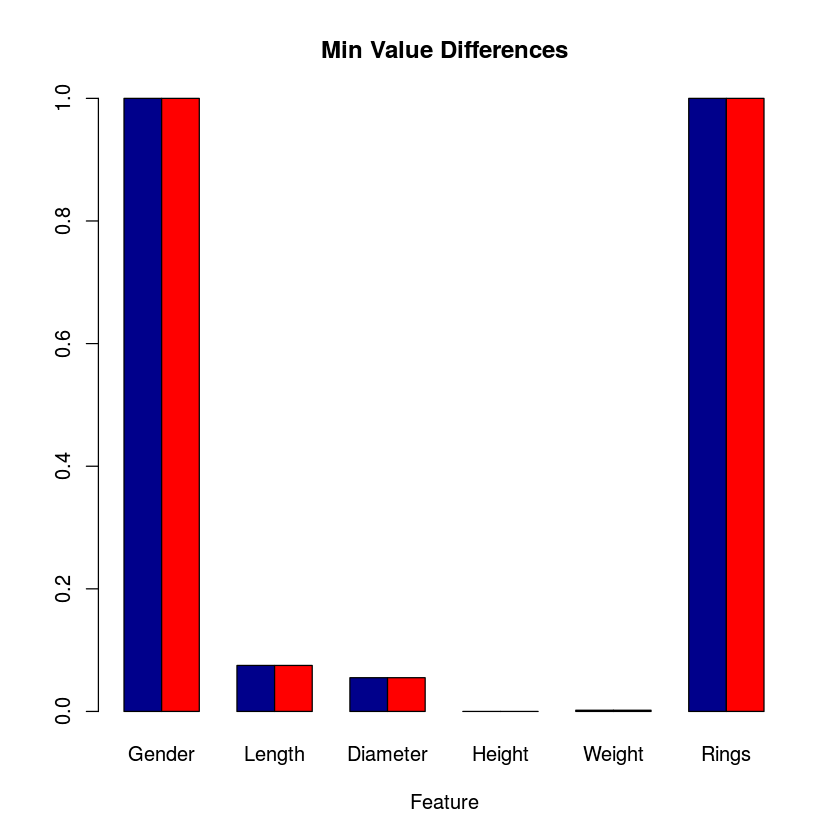

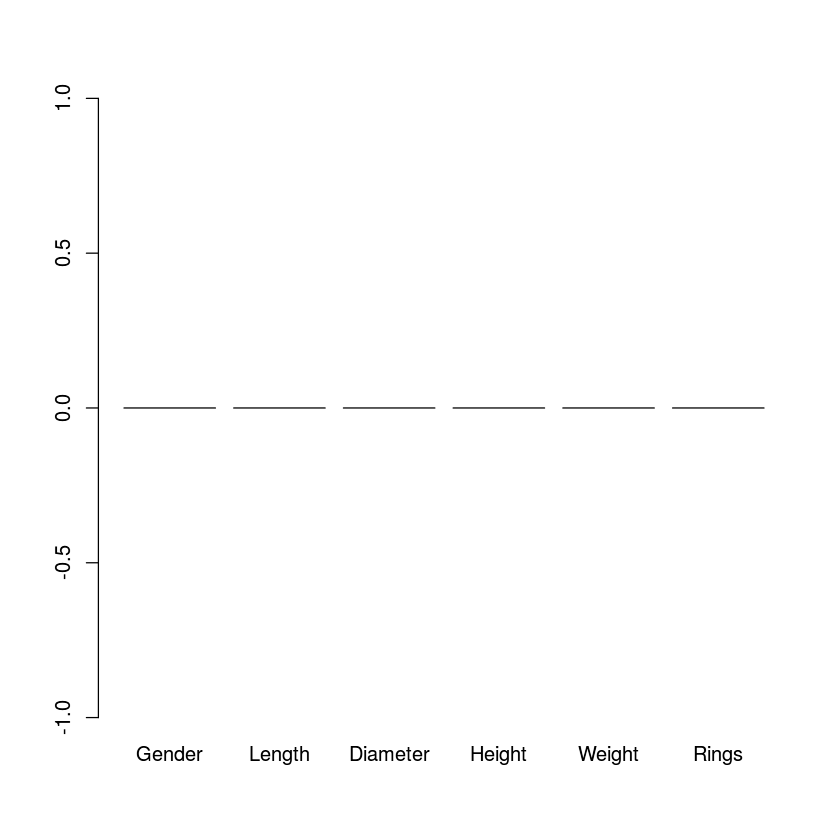

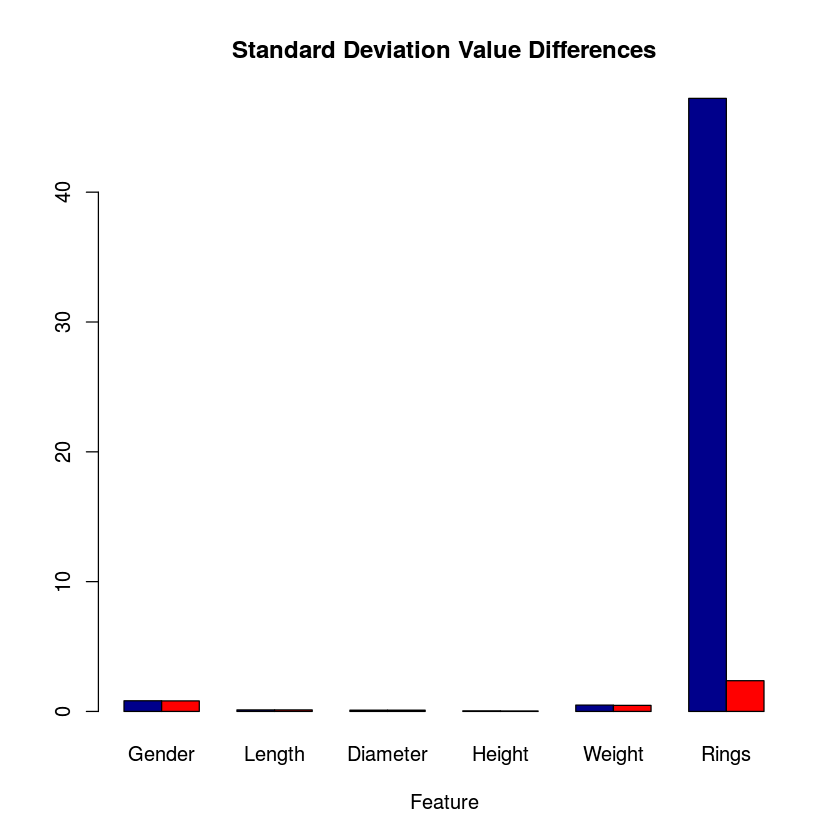

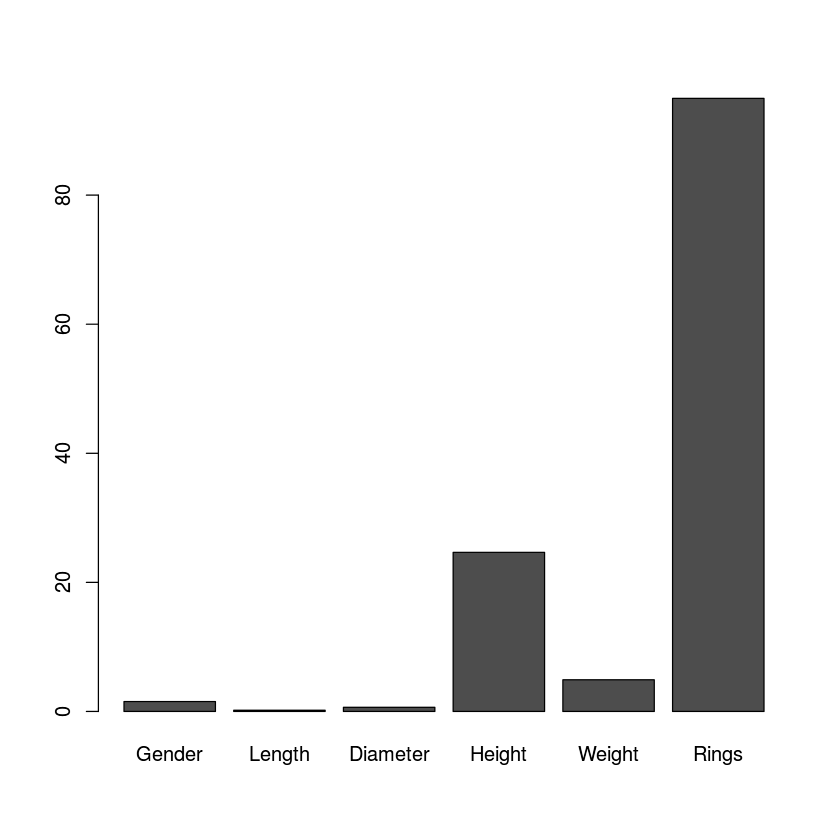

In [9]:
# Question 5
outliers = unique(c(outliersLength, outliersDiameter, outliersHeight, outliersWeight, outliersRings))
dataWoOutliers = data[-outliers,]

# Replacing M = 3, I = 2, F = 1 for gender
dataWoOutliers$Gender <- as.integer(dataWoOutliers$Gender)

# Mean of each column
means5 = colMeans(dataWoOutliers, na.rm=TRUE)

# Median of each column
medians5 = matrix(c(median(dataWoOutliers$Gender, na.rm=TRUE),
	median(dataWoOutliers$Length, na.rm=TRUE),
	median(dataWoOutliers$Diameter, na.rm=TRUE),
	median(dataWoOutliers$Height, na.rm=TRUE),
	median(dataWoOutliers$Weight, na.rm=TRUE),
	median(dataWoOutliers$Rings, na.rm=TRUE)), nrow=1, ncol=6)
colnames(medians5) <- columns
medians5

# Max
maxs5 = matrix(c(max(dataWoOutliers$Gender, na.rm=TRUE),
    max(dataWoOutliers$Length, na.rm=TRUE),
    max(dataWoOutliers$Diameter, na.rm=TRUE),
    max(dataWoOutliers$Height, na.rm=TRUE),
    max(dataWoOutliers$Weight, na.rm=TRUE),
    max(dataWoOutliers$Rings, na.rm=TRUE)),
    nrow=1, ncol=6)
colnames(maxs5) <- columns
maxs5

barplot(maxs5)
# Min
mins5 = matrix(c(min(dataWoOutliers$Gender, na.rm=TRUE),
    min(dataWoOutliers$Length, na.rm=TRUE),
    min(dataWoOutliers$Diameter, na.rm=TRUE),
    min(dataWoOutliers$Height, na.rm=TRUE),
    min(dataWoOutliers$Weight, na.rm=TRUE),
    min(dataWoOutliers$Rings, na.rm=TRUE)),
    nrow=1, ncol=6)
colnames(mins5) <- columns
mins5

# Standard Deviation of each column
sds5 = matrix(c(sd(dataWoOutliers$Gender, na.rm=TRUE),
    sd(dataWoOutliers$Length, na.rm=TRUE),
    sd(dataWoOutliers$Diameter, na.rm=TRUE),
    sd(dataWoOutliers$Height, na.rm=TRUE),
    sd(dataWoOutliers$Weight, na.rm=TRUE),
    sd(dataWoOutliers$Rings, na.rm=TRUE)),
    nrow=1, ncol=6)
colnames(sds5) <- columns
sds5

# Mean
barplot(rbind(medians, medians5), main="Mean Value Differences",
  xlab="Feature", col=c("darkblue","red"),
 	legend = rownames(medians), beside=TRUE)
# percentage difference
barplot((abs(means-means5)/means)*100)

# Median
barplot(rbind(medians, medians5), main="Median Value Differences",
  xlab="Feature", col=c("darkblue","red"),
 	legend = rownames(medians), beside=TRUE)
# percentage difference
barplot((abs(medians-medians5)/medians)*100)

# Max
barplot(rbind(maxs, maxs5), main="Max Value Differences",
  xlab="Feature", col=c("darkblue","red"),
 	legend = rownames(maxs), beside=TRUE)
# percentage difference
barplot((abs(maxs-maxs5)/maxs)*100)

# Min
barplot(rbind(mins, mins5), main="Min Value Differences",
  xlab="Feature", col=c("darkblue","red"),
 	legend = rownames(mins), beside=TRUE)
# percentage difference
barplot((abs(mins-mins5)/means)*100)

# Standard Deviation
barplot(rbind(sds, sds5), main="Standard Deviation Value Differences",
  xlab="Feature", col=c("darkblue","red"),
 	legend = rownames(sds), beside=TRUE)
# percentage difference
barplot((abs(sds-sds5)/sds)*100)



TASK 6

Suppose we have $N$ data points 
$$
\{(x_i,y_i), i=1,\ldots,N\}
$$

The function that describes a straight line is given by:
$$
y = w_0+w_1 \cdot x
$$

The goal is to find parameters $w_0$ and $w_1$ that would minimize sum of squares $S$:
$$
S = \sum_{i=1}^{N} \left( y_i - (w_0+w_1 \cdot x_i) \right)^2
$$

Here $S$ is a function of two independent variables: $w_0$ and $w_1$. In the minimum point of $S(w_0,w_1)$, first derivatives $\frac{\partial S}{\partial w_0}$ and $\frac{\partial S}{\partial w_1}$ should be zeros (necessary condition of extrema). Thus, we have a system of equations:
$$\left\{
                \begin{array}{ll}
                  \frac{\partial S}{\partial w_0} = 0\\
                  \frac{\partial S}{\partial w_1} = 0
                \end{array}
              \right.
$$

Calculating the derivatives,
$$\left\{
                \begin{array}{ll}
                  \sum_{i=1}^{N} \left( 2w_0 - 2y_i + 2w_1x_i \right) = 0\\
                  \sum_{i=1}^{N} \left( 2w_0x_i - 2y_ix_i + 2w_1x_i^2 \right) = 0
                \end{array}
              \right.
$$
The first equation can be transformed:
$$
\sum_{i=1}^{N} \left( w_0 - y_i + w_1x_i \right) = 0\\
\sum_{i=1}^{N} w_0  = \sum_{i=1}^{N} \left( y_i - w_1x_i \right) \\
w_0N  = \sum_{i=1}^{N} \left( y_i - w_1x_i \right) \\
w_0N  = \sum_{i=1}^{N} y_i - w_1 \sum_{i=1}^{N} x_i \\
w_0 = \bar{y} - w_1\bar{x}
$$

Now if we substitute $w_0$ in the second equation of the system with the value we have just found, we get:
$$
\sum_{i=1}^{N} \left( (\bar{y} - w_1\bar{x})x_i - y_ix_i + w_1x_i^2 \right) = 0
$$
Solving it for $w_1$:
$$
w_1 = \frac{\sum_{i=1}^{N} (x_i - \bar{x}) (y_i - \bar{y})} {\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$
Alternatively, one may notice that:
$$
w_1 = \frac{cov(x,y)}{var(x)}
$$
Now we just need to compute $w_0$ and $w_1$ using the formulae we have derived


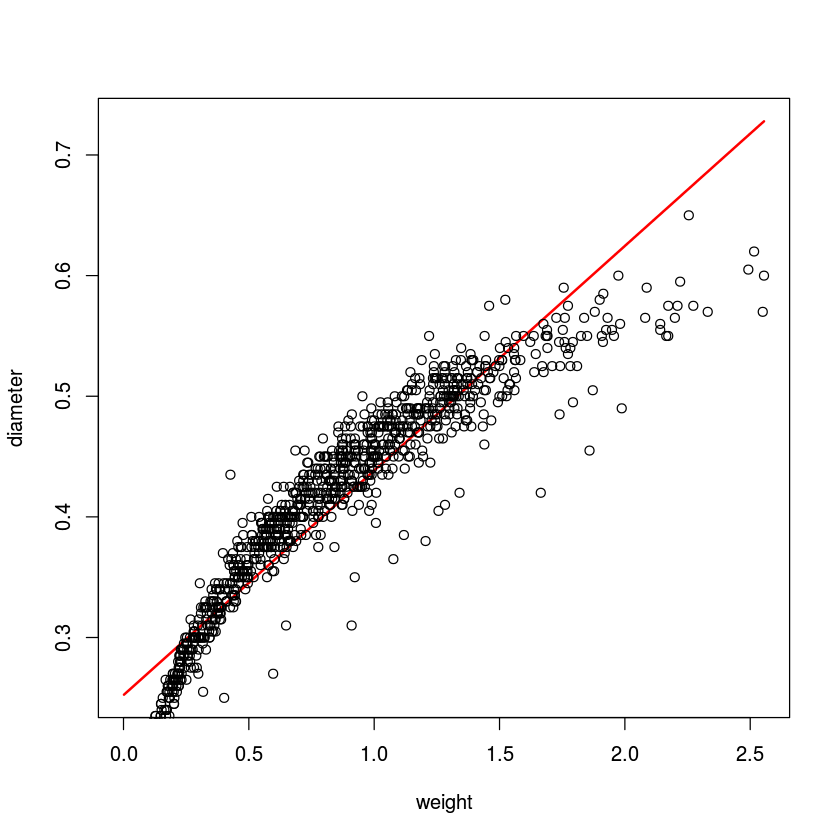

In [11]:
diameter <- data$Diameter
weight <- data$Weight
diameter.average <- mean(diameter)
weight.average <- mean(weight)
w1 <- sum((weight-weight.average)*(diameter-diameter.average))/sum((weight-weight.average)*(weight-weight.average))
w0 <- diameter.average-w1*weight.average 
plot(weight, w0 + w1*weight, col = "red", lwd=2, xlab = "weight", ylab = "diameter", type="l")
points(weight, diameter)
